In [0]:
## source: https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
cd '/gdrive/My Drive/CS230/Multi_Label_dataset'

/gdrive/My Drive/CS230/Multi_Label_dataset


In [0]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras import backend as K
%matplotlib inline

In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
#Import all of the labeling data into a Pandas Dataframe
train = pd.read_csv('train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [0]:

train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(100,100,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:32<00:00, 220.09it/s]


In [0]:
X.shape

(7254, 100, 100, 3)

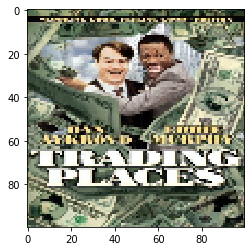

In [0]:
plt.imshow(X[2])

In [0]:
train['Genre'][2]

"['Comedy']"

In [0]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

In [0]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Train on 6528 samples, validate on 726 samples
Epoch 1/10
6528/6528 [==============================] - 6s 990us/step - loss: 0.2139 - acc: 0.9203 - f1_m: 0.3857 - precision_m: 0.6829 - recall_m: 0.2698 - val_loss: 0.2398 - val_acc: 0.9117 - val_f1_m: 0.3146 - val_precision_m: 0.5689 - val_recall_m: 0.2180
Epoch 2/10
6528/6528 [==============================] - 5s 701us/step - loss: 0.2133 - acc: 0.9210 - f1_m: 0.3933 - precision_m: 0.6881 - recall_m: 0.2764 - val_loss: 0.2378 - val_acc: 0.9122 - val_f1_m: 0.2956 - val_precision_m: 0.5859 - val_recall_m: 0.1983
Epoch 3/10
6528/6528 [==============================] - 5s 694us/step - loss: 0.2122 - acc: 0.9213 - f1_m: 0.3932 - precision_m: 0.6962 - recall_m: 0.2749 - val_loss: 0.2389 - val_acc: 0.9114 - val_f1_m: 0.2918 - val_precision_m: 0.5713 - val_recall_m: 0.1965
Epoch 4/10
6528/6528 [==============================] - 5s 692us/step - loss: 0.2126 - acc: 0.9212 - f1_m: 0.3954 - precision_m: 0.6916 - recall_m: 0.2779 - val_loss: 0.2381

In [0]:
img = image.load_img('GOT.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Drama (0.406)
Action (0.305)
Adventure (0.223)


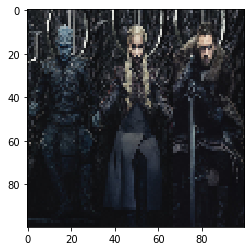

In [0]:

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('avengers.jpeg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Adventure (0.346)
Action (0.34)
Sci-Fi (0.254)


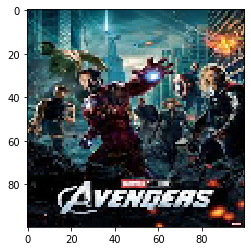

In [0]:

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


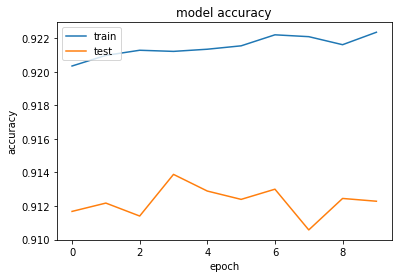

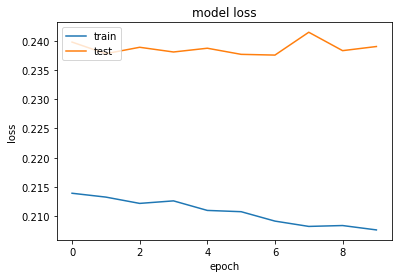

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve

pred = model.predict(X_test, batch_size=32, verbose=1)
predicted = np.where(pred > 0.1, 1, 0)
target_names = train.columns[2:]
report = classification_report(y_test, predicted, target_names=target_names)
print(report)
multilabel_confusion_matrix(y_test, predicted)

726/726 [==============================] - 0s 390us/step
              precision    recall  f1-score   support

      Action       0.19      0.96      0.31       137
   Adventure       0.11      1.00      0.19        77
   Animation       0.00      0.00      0.00        29
   Biography       0.00      0.00      0.00        32
      Comedy       0.44      0.99      0.61       312
       Crime       0.18      0.98      0.30       131
 Documentary       0.09      0.10      0.09        68
       Drama       0.49      1.00      0.66       357
      Family       0.17      0.13      0.15        45
     Fantasy       0.15      0.05      0.08        38
     History       0.00      0.00      0.00        23
      Horror       0.13      0.57      0.21        49
       Music       0.00      0.00      0.00        30
     Musical       0.00      0.00      0.00        14
     Mystery       0.08      0.33      0.13        42
         N/A       0.00      0.00      0.00         0
        News       0.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[[ 10, 579],
        [  5, 132]],

       [[  9, 640],
        [  0,  77]],

       [[697,   0],
        [ 29,   0]],

       [[694,   0],
        [ 32,   0]],

       [[ 18, 396],
        [  2, 310]],

       [[  7, 588],
        [  2, 129]],

       [[583,  75],
        [ 61,   7]],

       [[  0, 369],
        [  0, 357]],

       [[651,  30],
        [ 39,   6]],

       [[677,  11],
        [ 36,   2]],

       [[703,   0],
        [ 23,   0]],

       [[491, 186],
        [ 21,  28]],

       [[696,   0],
        [ 30,   0]],

       [[712,   0],
        [ 14,   0]],

       [[518, 166],
        [ 28,  14]],

       [[726,   0],
        [  0,   0]],

       [[723,   0],
        [  3,   0]],

       [[726,   0],
        [  0,   0]],

       [[ 27, 564],
        [  3, 132]],

       [[588, 107],
        [ 23,   8]],

       [[723,   0],
        [  3,   0]],

       [[700,   0],
        [ 26,   0]],

       [[241, 396],
        [ 12,  77]],

       [[710,   0],
        [ 16, 